Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
# imports
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
 lbl_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
print(x_train.shape)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train.shape

(60000, 28, 28)


(60000, 28, 28, 1)

# 1- **Preprocessing**

1- In this project, we are working with the mnist dataset from the keras package. Mnist is a database of handwritten figures. It is a dataset widely used in machine learning. These are standardized black and white samples (60000), centered with 28 pixels on each side. Therefore, our x_train has a shape (60000,28,28). In the dataset we can also find and array full of labels that indicate what is the number represented on each picture. 

Text(0.5, 1.0, '1st image on the x_train array')

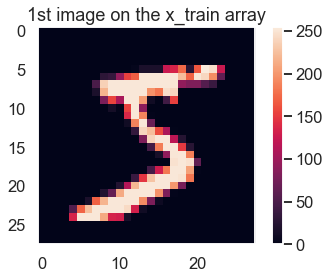

In [5]:
plt.figure()
plt.imshow(x_train[0] )
plt.colorbar()
plt.grid(False)
x_train.shape[0]
plt.title('1st image on the x_train array')

Since data scalling is and important step when working with deep learning learning neural networks it was necessary to do it during the pre-processing. These MNIST samples are represented as an array of numbers whose values range from [0, 255] of type uint8. So in order to scale them between 0 and 1, we divided x_train by 255 and transformed it into a float32 array as we can see down below.

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


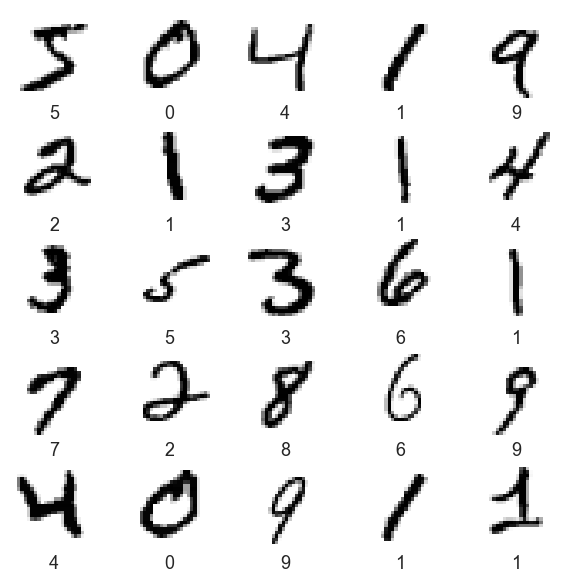

In [7]:
#####################"25 first figures " ###################

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(str(lbl_train[i]))
    
    

We also tranformed The y_train and y_test data into 10 distinct class labels upwards with the line
**y_train = keras.utils.to_categorical(lbl_train, num_classes)**. Thanks to this, we can get one different class for each digit and our y_train is now a [60000,10] array. 

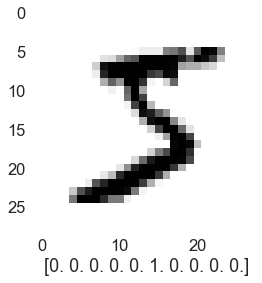

In [8]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.xlabel(str(y_train[0])) ### The 5th element should be equal to 1
plt.grid(False)

# 2 Network Model

In [9]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)


fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4771 - accuracy: 0.8643 - val_loss: 0.2538 - val_accuracy: 0.9290
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2294 - accuracy: 0.9330 - val_loss: 0.1951 - val_accuracy: 0.9435
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1789 - accuracy: 0.9477 - val_loss: 0.1568 - val_accuracy: 0.9552
Epoch 4/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1486 - accuracy: 0.9562 - val_loss: 0.1500 - val_accuracy: 0.9550
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1267 - accuracy: 0.9627 - val_loss: 0.1229 - val_accuracy: 0.9631
Epoch 6/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1102 - accuracy: 0.9675 - val_loss: 0.1214 - val_accuracy: 0.9629
Epoch 7/10
60000/60000 [==============================] 

### Question 2B

As we can see down below, the network has 4 layers. An input and Output one and two hidden layers. The 2 hidden layers have 64 differents neuros (code lines upwards) while the output has 10 which is normal because we can get numbers from 0 to 9. ## Input ???? 

### ReLlu ? Input ? 

Finally there is two activations functions used here. The softmax and relu. The softmax function is often used in the final layer of a neural network-based classifier. Softmax function is  know to be really efficient for multi-classification in logistic regression model which is the case here. Indeed Softmax assigns decimal probabilities to each class of a multi-class problem. The sum of these decimal probabilities must be equal to 1. This additional constraint allows learning to converge faster than it would otherwise.



In [10]:
model.layers

In [11]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  50240     
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### Question 2C

[0.86431664, 0.93305, 0.94775, 0.9561833, 0.9627, 0.96748334, 0.97113335, 0.9748333, 0.97641665, 0.97875]


<function matplotlib.pyplot.show(close=None, block=None)>

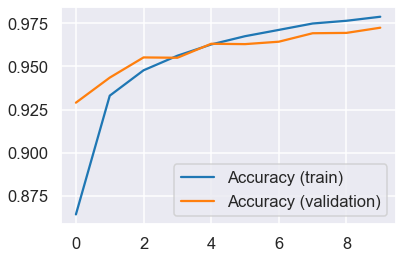

In [12]:
h=fit_info.history
print(h['accuracy'])
plt.plot(h["accuracy"],label="Accuracy (train)")
plt.plot(h["val_accuracy"],label="Accuracy (validation)")
plt.legend()
plt.show

### Question 4) Auto-Encoder for denoising


In [13]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [14]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1908 - val_loss: 0.1520
Epoch 2/32
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1459 - val_loss: 0.1384
Epoch 3/32
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1368 - val_loss: 0.1348
Epoch 4/32
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1321 - val_loss: 0.1303
Epoch 5/32
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1288 - val_loss: 0.1278
Epoch 6/32
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1265 - val_loss: 0.1268
Epoch 7/32
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1248 - val_loss: 0.1263
Epoch 8/32
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1235 - val_loss: 0.1238
Epoch 9/32
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1226 - val